## TCC CBB

Desenvolvido por Ricardo e Thyago.

#### Objetivo: 

Aplicação do TensorFlow 

Neste script o Tensorflow é aplicado e são feitas duas avaliações exaustivas sobre o Tensorflow, a primeira avaliação é baseada no número de componentes, com isso é possível encontrar a assertividade de classificação de cada componente.
A segunda avaliação, é baseada na divisão de teste/treino da base de dados, com ela obtem-se as assertividades dos componentes com o método k-fold variando de [0.1 a 1.0]

Neste script é utilizado a base de dados Churn in Telecom dataset's

### Import de bibliotecas

In [1]:
import random
from sklearn.svm import SVC

import bigml.api
import os
import pandas as pd
from bigml.api import BigML
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, model_selection, metrics
from sklearn.neural_network import MLPClassifier
import pandas as pd

### Import da base de dados via API

In [2]:
api = BigML('ricardomorellosantos','b34ec3c18161b1da38b0c5e04520224f7544405e')
api.download_dataset(dataset='dataset/5e356cd41efc9271bf006ea2', filename=os.getcwd()+'\\bigml.csv')

'C:\\Users\\Thyago M\\Desktop\\APLICAÇÕES TCC - RECENTE\\bigml.csv'

In [3]:
df_bigml = pd.read_csv(os.getcwd()+'\\bigml.csv')

In [4]:
df_bigml

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Função para conversão de dados categóricos em não categoricos 

In [5]:
def converte_binario(palavra):
    if palavra=='Yes' or palavra==True:
        return 0
    elif palavra=='No' or palavra==False:
        return 1

### Função para tratamento de dados

In [6]:
def descarregaBaseDados():
    df_bigml = pd.read_csv(os.getcwd()+'\\bigml.csv')
    states = df_bigml['State'].value_counts()
    df_bigml['Voice mail plan'] = df_bigml['Voice mail plan'].apply(converte_binario)
    df_bigml['International plan'] = df_bigml['International plan'].apply(converte_binario)
    
    df_bigml['Churn'] = df_bigml['Churn'].apply(converte_binario)
    df_bigml_target = df_bigml['Churn']
    df_bigml.drop('Churn', axis=1, inplace=True)
    df_bigml_target.head()
    
    print(df_bigml_target.value_counts())
    array_estados = []
    i = 0
    for index, val in states.iteritems():
        array_estados.append(index)    
        i = 0
    for estado in array_estados:
        df_bigml['State'] = df_bigml['State'].replace(to_replace=estado, value=i)
        i = i+1
    return df_bigml, df_bigml_target

### Validação cruzada com K-Fold

In [6]:
def aplicaKFold(x_pca, df_bigml_target):
    divisao = 0.2
    X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=divisao)
    return (X_train, X_test, y_train, y_test)

### Import do Tensorflow

In [9]:
#from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
#tensorflow.keras.models
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [10]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [11]:
def aplicaTensor(X_train, X_test, y_train, y_test, dim_input):
    model = Sequential()
    model.add(Dense(40, input_dim=dim_input, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, batch_size=100)
    
    predictionsTensor = model.predict_proba(X_test)
  
    return predictionsTensor

# APLICAÇÃO DO TENSOR FLOW

### AVALIAÇÃO EXAUSTIVA DO TENSORFLOW - BASEADO NO NÚMERO DE COMPONENTES

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### SCALED DATA

In [7]:
df_bigml, df_bigml_target = descarregaBaseDados()
scaler = StandardScaler()
scaler.fit(df_bigml)
scaled_data = scaler.transform(df_bigml)

1    2850
0     483
Name: Churn, dtype: int64


In [1]:
def aplicaKFoldAlterado(x_pca, df_bigml_target, divisao):
    #divisao = 0.2
    X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=divisao)
    return (X_train, X_test, y_train, y_test)

In [15]:
convergencia = False
auc_total = []
auc_num_componentes = []
media_anterior = 0

for numComponentes in range(1, 20):
    auc_componente = []
    media_anterior = 0
    qtd_iguais = 0
    pca = PCA(n_components = numComponentes)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    
    convergencia = False
    print("Componente", numComponentes)
    while(not convergencia):
        X_train, X_test, y_train, y_test = aplicaKFold(x_pca, df_bigml_target)
        
        predictedprob = aplicaTensor(X_train, X_test, y_train, y_test, numComponentes)
        fpr, tpr, thresholds = roc_curve(y_test, predictedprob)
        roc_auc = auc(fpr, tpr)
        auc_componente.append(roc_auc)
        media_aucs = round(sum(auc_componente) / len(auc_componente), 2)

        if media_anterior == media_aucs:
            qtd_iguais = qtd_iguais + 1
        if qtd_iguais == 10:
            auc_num_componentes.append(media_aucs)
            auc_total.append(auc_componente)
            convergencia = True
       
        media_anterior = media_aucs

Componente 1
Epoch 1/30
2666/2666 [==============================] - 0s 116us/step - loss: 0.5812 - accuracy: 0.8541
Epoch 2/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.4913 - accuracy: 0.8541
Epoch 3/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4565 - accuracy: 0.8541
Epoch 4/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4395 - accuracy: 0.8541
Epoch 5/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4274 - accuracy: 0.8541
Epoch 6/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4192 - accuracy: 0.8541
Epoch 7/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4150 - accuracy: 0.8541
Epoch 8/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.4135 - accuracy: 0.8541
Epoch 9/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.4123 - accuracy: 0.8541
Epoch 10/30
2666/2666 [==============================] - 0s

Epoch 1/30
2666/2666 [==============================] - 0s 101us/step - loss: 0.6112 - accuracy: 0.7911
Epoch 2/30
2666/2666 [==============================] - 0s 14us/step - loss: 0.5005 - accuracy: 0.8541
Epoch 3/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4640 - accuracy: 0.8541
Epoch 4/30
2666/2666 [==============================] - 0s 14us/step - loss: 0.4474 - accuracy: 0.8541
Epoch 5/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4333 - accuracy: 0.8541
Epoch 6/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4234 - accuracy: 0.8541
Epoch 7/30
2666/2666 [==============================] - 0s 14us/step - loss: 0.4175 - accuracy: 0.8541
Epoch 8/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4136 - accuracy: 0.8541
Epoch 9/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4118 - accuracy: 0.8541
Epoch 10/30
2666/2666 [==============================] - 0s 15us/step - 

2666/2666 [==============================] - 0s 14us/step - loss: 0.4101 - accuracy: 0.8541
Epoch 30/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4100 - accuracy: 0.8541
Media de AUCS 0.53
ROC CURVE 0.529594148007872
ROC AUC [0.5222327429356504, 0.5490419962125432, 0.5302532397608704, 0.5251290334558687, 0.5341613753666778, 0.5297612416917308, 0.5373454383424306, 0.5302532397608704, 0.5317013850209795, 0.529594148007872]
Media Anterior 0.53
QUANTIDADE 7
Epoch 1/30
2666/2666 [==============================] - 0s 98us/step - loss: 0.6420 - accuracy: 0.7033
Epoch 2/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4972 - accuracy: 0.8541
Epoch 3/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4666 - accuracy: 0.8541
Epoch 4/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4506 - accuracy: 0.8541
Epoch 5/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4364 - accuracy: 0.8541
E

2666/2666 [==============================] - 0s 15us/step - loss: 0.4043 - accuracy: 0.8563
Epoch 24/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4036 - accuracy: 0.8563
Epoch 25/30
2666/2666 [==============================] - 0s 14us/step - loss: 0.4029 - accuracy: 0.8563
Epoch 26/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4046 - accuracy: 0.8563
Epoch 27/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4028 - accuracy: 0.8563
Epoch 28/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4029 - accuracy: 0.8563
Epoch 29/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4024 - accuracy: 0.8563
Epoch 30/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4033 - accuracy: 0.8563
Media de AUCS 0.55
ROC CURVE 0.5589417989417989
ROC AUC [0.5498236331569665, 0.5589417989417989]
Media Anterior 0.55
QUANTIDADE 1
Epoch 1/30
2666/2666 [============================

2666/2666 [==============================] - 0s 15us/step - loss: 0.4050 - accuracy: 0.8563
Epoch 23/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4038 - accuracy: 0.8563
Epoch 24/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4046 - accuracy: 0.8563
Epoch 25/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4038 - accuracy: 0.8563
Epoch 26/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4036 - accuracy: 0.8563
Epoch 27/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4046 - accuracy: 0.8563
Epoch 28/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4026 - accuracy: 0.8563
Epoch 29/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4030 - accuracy: 0.8563
Epoch 30/30
2666/2666 [==============================] - 0s 14us/step - loss: 0.4035 - accuracy: 0.8563
Media de AUCS 0.55
ROC CURVE 0.5490299823633158
ROC AUC [0.5498236331569665,

2666/2666 [==============================] - 0s 15us/step - loss: 0.4048 - accuracy: 0.8563
Epoch 17/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4041 - accuracy: 0.8563
Epoch 18/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4042 - accuracy: 0.8563
Epoch 19/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4038 - accuracy: 0.8563
Epoch 20/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4052 - accuracy: 0.8563
Epoch 21/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4037 - accuracy: 0.8563
Epoch 22/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4041 - accuracy: 0.8563
Epoch 23/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.4042 - accuracy: 0.8563
Epoch 24/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4044 - accuracy: 0.8563
Epoch 25/30
2666/2666 [==============================] - 0s 15us/step - loss

2666/2666 [==============================] - 0s 15us/step - loss: 0.3645 - accuracy: 0.8687
Epoch 14/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.3618 - accuracy: 0.8706
Epoch 15/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3600 - accuracy: 0.8710
Epoch 16/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.3587 - accuracy: 0.8683
Epoch 17/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3575 - accuracy: 0.8706
Epoch 18/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3572 - accuracy: 0.8702
Epoch 19/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3554 - accuracy: 0.8702
Epoch 20/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3543 - accuracy: 0.8698
Epoch 21/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3541 - accuracy: 0.8695
Epoch 22/30
2666/2666 [==============================] - 0s 15us/step - loss

2666/2666 [==============================] - 0s 16us/step - loss: 0.3675 - accuracy: 0.8691
Epoch 11/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3632 - accuracy: 0.8691
Epoch 12/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3611 - accuracy: 0.8702
Epoch 13/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3588 - accuracy: 0.8687
Epoch 14/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3583 - accuracy: 0.8680
Epoch 15/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3556 - accuracy: 0.8698
Epoch 16/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3550 - accuracy: 0.8728
Epoch 17/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.3544 - accuracy: 0.8683
Epoch 18/30
2666/2666 [==============================] - 0s 26us/step - loss: 0.3543 - accuracy: 0.8702
Epoch 19/30
2666/2666 [==============================] - 0s 24us/step - loss

2666/2666 [==============================] - 0s 17us/step - loss: 0.3672 - accuracy: 0.8770
Epoch 7/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3611 - accuracy: 0.8815
Epoch 8/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.3565 - accuracy: 0.8818
Epoch 9/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3510 - accuracy: 0.8833
Epoch 10/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.3470 - accuracy: 0.8852
Epoch 11/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.3434 - accuracy: 0.8875
Epoch 12/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3395 - accuracy: 0.8875
Epoch 13/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3371 - accuracy: 0.8893
Epoch 14/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3342 - accuracy: 0.8863
Epoch 15/30
2666/2666 [==============================] - 0s 18us/step - loss: 0

2666/2666 [==============================] - 0s 16us/step - loss: 0.3962 - accuracy: 0.8586
Epoch 5/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3861 - accuracy: 0.8676
Epoch 6/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.3780 - accuracy: 0.8740
Epoch 7/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.3701 - accuracy: 0.8758
Epoch 8/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3629 - accuracy: 0.8792
Epoch 9/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3573 - accuracy: 0.8777
Epoch 10/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3524 - accuracy: 0.8833
Epoch 11/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3475 - accuracy: 0.8848
Epoch 12/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3433 - accuracy: 0.8863
Epoch 13/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3

2666/2666 [==============================] - 0s 22us/step - loss: 0.3263 - accuracy: 0.8890
Epoch 19/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.3235 - accuracy: 0.8882
Epoch 20/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.3224 - accuracy: 0.8893
Epoch 21/30
2666/2666 [==============================] - 0s 35us/step - loss: 0.3202 - accuracy: 0.8908
Epoch 22/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.3184 - accuracy: 0.8882
Epoch 23/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.3179 - accuracy: 0.8890
Epoch 24/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.3161 - accuracy: 0.8916
Epoch 25/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.3158 - accuracy: 0.8901
Epoch 26/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.3148 - accuracy: 0.8927
Epoch 27/30
2666/2666 [==============================] - 0s 27us/step - loss

QUANTIDADE 0
Epoch 1/30
2666/2666 [==============================] - 0s 122us/step - loss: 0.5096 - accuracy: 0.8170
Epoch 2/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.4101 - accuracy: 0.8567
Epoch 3/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3875 - accuracy: 0.8646
Epoch 4/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3719 - accuracy: 0.8785
Epoch 5/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3588 - accuracy: 0.8837
Epoch 6/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3470 - accuracy: 0.8938
Epoch 7/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3371 - accuracy: 0.8950
Epoch 8/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3293 - accuracy: 0.8976
Epoch 9/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.3229 - accuracy: 0.8998
Epoch 10/30
2666/2666 [==============================] - 0s

Epoch 1/30
2666/2666 [==============================] - 0s 103us/step - loss: 0.5833 - accuracy: 0.6962
Epoch 2/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.4223 - accuracy: 0.8567
Epoch 3/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3862 - accuracy: 0.8687
Epoch 4/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3699 - accuracy: 0.8796
Epoch 5/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3582 - accuracy: 0.8815
Epoch 6/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3485 - accuracy: 0.8901
Epoch 7/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3404 - accuracy: 0.8927
Epoch 8/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3344 - accuracy: 0.8946
Epoch 9/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.3281 - accuracy: 0.8961
Epoch 10/30
2666/2666 [==============================] - 0s 18us/step - 

2666/2666 [==============================] - 0s 25us/step - loss: 0.2854 - accuracy: 0.9100
Epoch 29/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.2846 - accuracy: 0.9077
Epoch 30/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2844 - accuracy: 0.9092
Media de AUCS 0.75
ROC CURVE 0.7451807018157646
ROC AUC [0.7586327537347375, 0.753209949970262, 0.7560787880908232, 0.741017387957877, 0.7565161109750551, 0.7572683063359339, 0.7496413952349299, 0.7490291431970053, 0.7400902634433054, 0.7519854458944129, 0.7451807018157646]
Media Anterior 0.75
QUANTIDADE 9
Epoch 1/30
2666/2666 [==============================] - 0s 121us/step - loss: 0.6196 - accuracy: 0.6557
Epoch 2/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.4352 - accuracy: 0.8567
Epoch 3/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.4076 - accuracy: 0.8571
Epoch 4/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.387

2666/2666 [==============================] - 0s 18us/step - loss: 0.2824 - accuracy: 0.9077
Epoch 26/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2818 - accuracy: 0.9092
Epoch 27/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2804 - accuracy: 0.9081
Epoch 28/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2796 - accuracy: 0.9077
Epoch 29/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2791 - accuracy: 0.9100
Epoch 30/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2780 - accuracy: 0.9092
Media de AUCS 0.76
ROC CURVE 0.7664611936116559
ROC AUC [0.7653604451026698, 0.7614577912980827, 0.7646999959972782, 0.7664611936116559]
Media Anterior 0.76
QUANTIDADE 2
Epoch 1/30
2666/2666 [==============================] - 0s 148us/step - loss: 0.4778 - accuracy: 0.8507
Epoch 2/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.4116 - accuracy: 0.8575
Epoch 3/30


2666/2666 [==============================] - 0s 15us/step - loss: 0.2851 - accuracy: 0.9059
Epoch 23/30
2666/2666 [==============================] - 0s 29us/step - loss: 0.2849 - accuracy: 0.9059
Epoch 24/30
2666/2666 [==============================] - 0s 28us/step - loss: 0.2825 - accuracy: 0.9070
Epoch 25/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2814 - accuracy: 0.9089
Epoch 26/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2805 - accuracy: 0.9074
Epoch 27/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2792 - accuracy: 0.9066
Epoch 28/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.2783 - accuracy: 0.9077
Epoch 29/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.2767 - accuracy: 0.9096
Epoch 30/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2763 - accuracy: 0.9070
Media de AUCS 0.76
ROC CURVE 0.7678221190409478
ROC AUC [0.7653604451026698,

2666/2666 [==============================] - 0s 30us/step - loss: 0.3029 - accuracy: 0.9010
Epoch 15/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.3011 - accuracy: 0.9021
Epoch 16/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2976 - accuracy: 0.9044
Epoch 17/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2950 - accuracy: 0.9044
Epoch 18/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2937 - accuracy: 0.9044
Epoch 19/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2921 - accuracy: 0.9055
Epoch 20/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2897 - accuracy: 0.9051
Epoch 21/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.2882 - accuracy: 0.9066
Epoch 22/30
2666/2666 [==============================] - 0s 26us/step - loss: 0.2864 - accuracy: 0.9062
Epoch 23/30
2666/2666 [==============================] - 0s 26us/step - loss

2666/2666 [==============================] - 0s 24us/step - loss: 0.3176 - accuracy: 0.8912
Epoch 12/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.3112 - accuracy: 0.8923
Epoch 13/30
2666/2666 [==============================] - 0s 26us/step - loss: 0.3041 - accuracy: 0.8976
Epoch 14/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.2978 - accuracy: 0.8987
Epoch 15/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.2944 - accuracy: 0.9029
Epoch 16/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2895 - accuracy: 0.9040
Epoch 17/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2848 - accuracy: 0.9066
Epoch 18/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2817 - accuracy: 0.9077
Epoch 19/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2783 - accuracy: 0.9062
Epoch 20/30
2666/2666 [==============================] - 0s 27us/step - loss

2666/2666 [==============================] - 0s 21us/step - loss: 0.3273 - accuracy: 0.8897
Epoch 8/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.3173 - accuracy: 0.8957
Epoch 9/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.3088 - accuracy: 0.9006
Epoch 10/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.3019 - accuracy: 0.8998
Epoch 11/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2952 - accuracy: 0.9036
Epoch 12/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.2896 - accuracy: 0.9032
Epoch 13/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2855 - accuracy: 0.9051
Epoch 14/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2796 - accuracy: 0.9066
Epoch 15/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.2754 - accuracy: 0.9081
Epoch 16/30
2666/2666 [==============================] - 0s 19us/step - loss: 

2666/2666 [==============================] - 0s 21us/step - loss: 0.3279 - accuracy: 0.8882
Epoch 6/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.3149 - accuracy: 0.8905
Epoch 7/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.3041 - accuracy: 0.8950
Epoch 8/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2956 - accuracy: 0.8995
Epoch 9/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2877 - accuracy: 0.9021
Epoch 10/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2813 - accuracy: 0.9029
Epoch 11/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2769 - accuracy: 0.9036
Epoch 12/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2715 - accuracy: 0.9047
Epoch 13/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2660 - accuracy: 0.9077
Epoch 14/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.

2666/2666 [==============================] - 0s 17us/step - loss: 0.3992 - accuracy: 0.8593
Epoch 3/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3611 - accuracy: 0.8695
Epoch 4/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3401 - accuracy: 0.8777
Epoch 5/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3262 - accuracy: 0.8841
Epoch 6/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3157 - accuracy: 0.8890
Epoch 7/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3061 - accuracy: 0.8931
Epoch 8/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2974 - accuracy: 0.8961
Epoch 9/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2902 - accuracy: 0.8980
Epoch 10/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2837 - accuracy: 0.9021
Epoch 11/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.277

2666/2666 [==============================] - 0s 17us/step - loss: 0.2216 - accuracy: 0.9220
Epoch 30/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2188 - accuracy: 0.9254
Media de AUCS 0.85
ROC CURVE 0.8569187145557656
ROC AUC [0.8504536862003782, 0.8569187145557656]
Media Anterior 0.85
QUANTIDADE 1
Epoch 1/30
2666/2666 [==============================] - 0s 139us/step - loss: 0.4935 - accuracy: 0.8271
Epoch 2/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.4089 - accuracy: 0.8533
Epoch 3/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3754 - accuracy: 0.8567
Epoch 4/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.3543 - accuracy: 0.8631
Epoch 5/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3382 - accuracy: 0.8740
Epoch 6/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.3246 - accuracy: 0.8841
Epoch 7/30
2666/2666 [==============================] -

2666/2666 [==============================] - 0s 20us/step - loss: 0.2256 - accuracy: 0.9205
Epoch 29/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2249 - accuracy: 0.9216
Epoch 30/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.2226 - accuracy: 0.9227
Media de AUCS 0.85
ROC CURVE 0.8371833648393194
ROC AUC [0.8504536862003782, 0.8569187145557656, 0.8558601134215501, 0.8457088846880908, 0.844820415879017, 0.8531001890359168, 0.8371833648393194]
Media Anterior 0.85
QUANTIDADE 6
Epoch 1/30
2666/2666 [==============================] - 0s 144us/step - loss: 0.6013 - accuracy: 0.6710
Epoch 2/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.4112 - accuracy: 0.8533
Epoch 3/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3836 - accuracy: 0.8545
Epoch 4/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.3633 - accuracy: 0.8642
Epoch 5/30
2666/2666 [==============================] - 0s

Epoch 10/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2816 - accuracy: 0.9006
Epoch 11/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2740 - accuracy: 0.9017
Epoch 12/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2696 - accuracy: 0.9025
Epoch 13/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2637 - accuracy: 0.9051
Epoch 14/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2595 - accuracy: 0.9089
Epoch 15/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2546 - accuracy: 0.9111
Epoch 16/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2521 - accuracy: 0.9126
Epoch 17/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2479 - accuracy: 0.9141
Epoch 18/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2449 - accuracy: 0.9149
Epoch 19/30
2666/2666 [==============================] - 0s 18us

2666/2666 [==============================] - 0s 18us/step - loss: 0.2155 - accuracy: 0.9254
Epoch 24/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2132 - accuracy: 0.9272
Epoch 25/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2099 - accuracy: 0.9284
Epoch 26/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2067 - accuracy: 0.9295
Epoch 27/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2053 - accuracy: 0.9325
Epoch 28/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2017 - accuracy: 0.9317
Epoch 29/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2007 - accuracy: 0.9340
Epoch 30/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.1986 - accuracy: 0.9366
Media de AUCS 0.91
ROC CURVE 0.9084862711623275
ROC AUC [0.9084862711623275]
Media Anterior 0.91
QUANTIDADE 0
Epoch 1/30
2666/2666 [==============================] - 0s 111us/step 

2666/2666 [==============================] - 0s 19us/step - loss: 0.2040 - accuracy: 0.9325
Epoch 24/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2026 - accuracy: 0.9314
Epoch 25/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.2004 - accuracy: 0.9336
Epoch 26/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.1972 - accuracy: 0.9370
Epoch 27/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1943 - accuracy: 0.9359
Epoch 28/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.1931 - accuracy: 0.9351
Epoch 29/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.1906 - accuracy: 0.9385
Epoch 30/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.1886 - accuracy: 0.9404
Media de AUCS 0.91
ROC CURVE 0.9074370465215537
ROC AUC [0.9084862711623275, 0.9070280267463365, 0.9021909233176839, 0.9139813629250249, 0.9082906530089628, 0.9074370465215537]
Med

2666/2666 [==============================] - 0s 27us/step - loss: 0.2257 - accuracy: 0.9242
Epoch 19/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.2229 - accuracy: 0.9246
Epoch 20/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2189 - accuracy: 0.9269
Epoch 21/30
2666/2666 [==============================] - 0s 28us/step - loss: 0.2153 - accuracy: 0.9269
Epoch 22/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.2117 - accuracy: 0.9295
Epoch 23/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.2102 - accuracy: 0.9276
Epoch 24/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2072 - accuracy: 0.9299
Epoch 25/30
2666/2666 [==============================] - 0s 39us/step - loss: 0.2040 - accuracy: 0.9329
Epoch 26/30
2666/2666 [==============================] - 0s 30us/step - loss: 0.2017 - accuracy: 0.9332
Epoch 27/30
2666/2666 [==============================] - 0s 25us/step - loss

2666/2666 [==============================] - 0s 24us/step - loss: 0.2354 - accuracy: 0.9167
Epoch 18/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.2316 - accuracy: 0.9201
Epoch 19/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2280 - accuracy: 0.9235
Epoch 20/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2239 - accuracy: 0.9269
Epoch 21/30
2666/2666 [==============================] - 0s 36us/step - loss: 0.2197 - accuracy: 0.9254
Epoch 22/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2175 - accuracy: 0.9321
Epoch 23/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2155 - accuracy: 0.9295
Epoch 24/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2121 - accuracy: 0.9310
Epoch 25/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2117 - accuracy: 0.9276
Epoch 26/30
2666/2666 [==============================] - 0s 20us/step - loss

Epoch 1/30
2666/2666 [==============================] - 0s 127us/step - loss: 0.5034 - accuracy: 0.8136
Epoch 2/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.4180 - accuracy: 0.8500
Epoch 3/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3903 - accuracy: 0.8530
Epoch 4/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.3711 - accuracy: 0.8665
Epoch 5/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.3544 - accuracy: 0.8721
Epoch 6/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.3379 - accuracy: 0.8740
Epoch 7/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.3222 - accuracy: 0.8788
Epoch 8/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.3062 - accuracy: 0.8848
Epoch 9/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2910 - accuracy: 0.8931
Epoch 10/30
2666/2666 [==============================] - 0s 23us/step - 

2666/2666 [==============================] - 0s 19us/step - loss: 0.2408 - accuracy: 0.9194
Epoch 16/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2364 - accuracy: 0.9201
Epoch 17/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2321 - accuracy: 0.9209
Epoch 18/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2276 - accuracy: 0.9235
Epoch 19/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2264 - accuracy: 0.9250
Epoch 20/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2207 - accuracy: 0.9257
Epoch 21/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2182 - accuracy: 0.9295
Epoch 22/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2147 - accuracy: 0.9306
Epoch 23/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2113 - accuracy: 0.9291
Epoch 24/30
2666/2666 [==============================] - 0s 16us/step - loss

2666/2666 [==============================] - 0s 19us/step - loss: 0.3065 - accuracy: 0.8875
Epoch 8/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.2928 - accuracy: 0.8931
Epoch 9/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2817 - accuracy: 0.8972
Epoch 10/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2722 - accuracy: 0.8972
Epoch 11/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2637 - accuracy: 0.9040
Epoch 12/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2553 - accuracy: 0.9070
Epoch 13/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2481 - accuracy: 0.9085
Epoch 14/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2415 - accuracy: 0.9134
Epoch 15/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2363 - accuracy: 0.9164
Epoch 16/30
2666/2666 [==============================] - 0s 22us/step - loss: 

2666/2666 [==============================] - 0s 18us/step - loss: 0.2021 - accuracy: 0.9329
Epoch 29/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1977 - accuracy: 0.9344
Epoch 30/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.1947 - accuracy: 0.9392
Media de AUCS 0.89
ROC CURVE 0.8824888595477801
ROC AUC [0.8906997854431424, 0.8787960059415745, 0.8757426968146559, 0.893753094570061, 0.8877702591186665, 0.8846344281234527, 0.882592011883149, 0.8803432909721075, 0.8878527809869616, 0.8895238488199373, 0.8821175111404521, 0.8872338669747483, 0.8773725037134841, 0.8857484733454366, 0.8964350552896517, 0.8858928866149529, 0.8869656709027892, 0.8925565274797821, 0.8824888595477801]
Media Anterior 0.89
QUANTIDADE 10
Componente 12
Epoch 1/30
2666/2666 [==============================] - 0s 109us/step - loss: 0.5029 - accuracy: 0.8425
Epoch 2/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.4250 - accuracy: 0.8500
Epoch 3/30

Epoch 26/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1902 - accuracy: 0.9366
Epoch 27/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1877 - accuracy: 0.9374
Epoch 28/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.1851 - accuracy: 0.9404
Epoch 29/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1819 - accuracy: 0.9389
Epoch 30/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.1797 - accuracy: 0.9377
Media de AUCS 0.88
ROC CURVE 0.8753713484073279
ROC AUC [0.8907616768443638, 0.8832521868295098, 0.8860579303515431, 0.8692853606205645, 0.8753713484073279]
Media Anterior 0.88
QUANTIDADE 3
Epoch 1/30
2666/2666 [==============================] - 0s 119us/step - loss: 0.4850 - accuracy: 0.8230
Epoch 2/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3937 - accuracy: 0.8500
Epoch 3/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3697

2666/2666 [==============================] - 0s 18us/step - loss: 0.2100 - accuracy: 0.9317
Epoch 23/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2075 - accuracy: 0.9321
Epoch 24/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2043 - accuracy: 0.9329
Epoch 25/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2009 - accuracy: 0.9329
Epoch 26/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1993 - accuracy: 0.9317
Epoch 27/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.1964 - accuracy: 0.9314
Epoch 28/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.1924 - accuracy: 0.9336
Epoch 29/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1903 - accuracy: 0.9344
Epoch 30/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1884 - accuracy: 0.9347
Media de AUCS 0.88
ROC CURVE 0.8776819607195906
ROC AUC [0.8907616768443638,

2666/2666 [==============================] - 0s 17us/step - loss: 0.3950 - accuracy: 0.8503
Epoch 3/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3649 - accuracy: 0.8593
Epoch 4/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3441 - accuracy: 0.8751
Epoch 5/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3240 - accuracy: 0.8792
Epoch 6/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3053 - accuracy: 0.8867
Epoch 7/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2903 - accuracy: 0.8916
Epoch 8/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2784 - accuracy: 0.8968
Epoch 9/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2685 - accuracy: 0.9014
Epoch 10/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2611 - accuracy: 0.9051
Epoch 11/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.254

2666/2666 [==============================] - 0s 18us/step - loss: 0.2326 - accuracy: 0.9182
Epoch 15/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2259 - accuracy: 0.9197
Epoch 16/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2201 - accuracy: 0.9235
Epoch 17/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2140 - accuracy: 0.9265
Epoch 18/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2088 - accuracy: 0.9306
Epoch 19/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2051 - accuracy: 0.9284
Epoch 20/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2006 - accuracy: 0.9329
Epoch 21/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.1967 - accuracy: 0.9344
Epoch 22/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.1945 - accuracy: 0.9332
Epoch 23/30
2666/2666 [==============================] - 0s 18us/step - loss

2666/2666 [==============================] - 0s 25us/step - loss: 0.2274 - accuracy: 0.9190
Epoch 15/30
2666/2666 [==============================] - 0s 26us/step - loss: 0.2203 - accuracy: 0.9231
Epoch 16/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2138 - accuracy: 0.9254
Epoch 17/30
2666/2666 [==============================] - 0s 45us/step - loss: 0.2098 - accuracy: 0.9231
Epoch 18/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2059 - accuracy: 0.9276
Epoch 19/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2019 - accuracy: 0.9291
Epoch 20/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.1973 - accuracy: 0.9287
Epoch 21/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.1934 - accuracy: 0.9336
Epoch 22/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1910 - accuracy: 0.9325
Epoch 23/30
2666/2666 [==============================] - 0s 20us/step - loss

2666/2666 [==============================] - 0s 27us/step - loss: 0.1784 - accuracy: 0.9449
Epoch 29/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.1762 - accuracy: 0.9437
Epoch 30/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.1735 - accuracy: 0.9437
Media de AUCS 0.87
ROC CURVE 0.8745878896686796
ROC AUC [0.8744899624612371, 0.8822914966541537, 0.8711930798106741, 0.8831565203198956, 0.8534845764648279, 0.8761384037865187, 0.873527011588053, 0.8745878896686796]
Media Anterior 0.87
QUANTIDADE 5
Epoch 1/30
2666/2666 [==============================] - 0s 143us/step - loss: 0.4558 - accuracy: 0.8586
Epoch 2/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.3848 - accuracy: 0.8601
Epoch 3/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.3511 - accuracy: 0.8683
Epoch 4/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3268 - accuracy: 0.8770
Epoch 5/30
2666/2666 [================

2666/2666 [==============================] - 0s 23us/step - loss: 0.2006 - accuracy: 0.9314
Epoch 22/30
2666/2666 [==============================] - 0s 34us/step - loss: 0.1970 - accuracy: 0.9306
Epoch 23/30
2666/2666 [==============================] - 0s 31us/step - loss: 0.1927 - accuracy: 0.9359
Epoch 24/30
2666/2666 [==============================] - 0s 29us/step - loss: 0.1893 - accuracy: 0.9336
Epoch 25/30
2666/2666 [==============================] - 0s 29us/step - loss: 0.1859 - accuracy: 0.9359 0s - loss: 0.1836 - accuracy: 0.93
Epoch 26/30
2666/2666 [==============================] - 0s 28us/step - loss: 0.1830 - accuracy: 0.9396
Epoch 27/30
2666/2666 [==============================] - 0s 28us/step - loss: 0.1814 - accuracy: 0.9374
Epoch 28/30
2666/2666 [==============================] - 0s 26us/step - loss: 0.1772 - accuracy: 0.9434
Epoch 29/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.1737 - accuracy: 0.9426
Epoch 30/30
2666/2666 [==================

2666/2666 [==============================] - 0s 20us/step - loss: 0.2119 - accuracy: 0.9265
Epoch 19/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.2092 - accuracy: 0.9254
Epoch 20/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2064 - accuracy: 0.9295
Epoch 21/30
2666/2666 [==============================] - 0s 26us/step - loss: 0.2026 - accuracy: 0.9314
Epoch 22/30
2666/2666 [==============================] - 0s 29us/step - loss: 0.2002 - accuracy: 0.9321
Epoch 23/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.1974 - accuracy: 0.9314
Epoch 24/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.1949 - accuracy: 0.9351
Epoch 25/30
2666/2666 [==============================] - 0s 26us/step - loss: 0.1945 - accuracy: 0.9336
Epoch 26/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.1918 - accuracy: 0.9344
Epoch 27/30
2666/2666 [==============================] - 0s 35us/step - loss

Epoch 1/30
2666/2666 [==============================] - 0s 132us/step - loss: 0.4680 - accuracy: 0.8477
Epoch 2/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.3878 - accuracy: 0.8541
Epoch 3/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3495 - accuracy: 0.8582
Epoch 4/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3297 - accuracy: 0.8631
Epoch 5/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.3135 - accuracy: 0.8706
Epoch 6/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.3013 - accuracy: 0.8725
Epoch 7/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2873 - accuracy: 0.8848
Epoch 8/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.2745 - accuracy: 0.8901
Epoch 9/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2611 - accuracy: 0.8995
Epoch 10/30
2666/2666 [==============================] - 0s 21us/step - 

2666/2666 [==============================] - 0s 25us/step - loss: 0.2218 - accuracy: 0.9201
Epoch 16/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.2163 - accuracy: 0.9239
Epoch 17/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2132 - accuracy: 0.9269
Epoch 18/30
2666/2666 [==============================] - 0s 29us/step - loss: 0.2096 - accuracy: 0.9287
Epoch 19/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2062 - accuracy: 0.9291
Epoch 20/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2031 - accuracy: 0.9291
Epoch 21/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.1996 - accuracy: 0.9347
Epoch 22/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.1969 - accuracy: 0.9329
Epoch 23/30
2666/2666 [==============================] - 0s 31us/step - loss: 0.1939 - accuracy: 0.9362
Epoch 24/30
2666/2666 [==============================] - 0s 27us/step - loss

2666/2666 [==============================] - 0s 19us/step - loss: 0.2206 - accuracy: 0.9254
Epoch 13/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2154 - accuracy: 0.9280
Epoch 14/30
2666/2666 [==============================] - 0s 28us/step - loss: 0.2110 - accuracy: 0.9291
Epoch 15/30
2666/2666 [==============================] - 0s 28us/step - loss: 0.2080 - accuracy: 0.9344
Epoch 16/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2024 - accuracy: 0.9370
Epoch 17/30
2666/2666 [==============================] - 0s 29us/step - loss: 0.1982 - accuracy: 0.9385
Epoch 18/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.1955 - accuracy: 0.9422
Epoch 19/30
2666/2666 [==============================] - 0s 30us/step - loss: 0.1914 - accuracy: 0.9430
Epoch 20/30
2666/2666 [==============================] - 0s 30us/step - loss: 0.1880 - accuracy: 0.9452
Epoch 21/30
2666/2666 [==============================] - 0s 28us/step - loss

2666/2666 [==============================] - 0s 23us/step - loss: 0.2427 - accuracy: 0.9119
Epoch 10/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.2322 - accuracy: 0.9175
Epoch 11/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2232 - accuracy: 0.9216
Epoch 12/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2168 - accuracy: 0.9272
Epoch 13/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2118 - accuracy: 0.9272
Epoch 14/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2054 - accuracy: 0.9295
Epoch 15/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2018 - accuracy: 0.9344
Epoch 16/30
2666/2666 [==============================] - 0s 26us/step - loss: 0.1972 - accuracy: 0.9344
Epoch 17/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.1926 - accuracy: 0.9374
Epoch 18/30
2666/2666 [==============================] - 0s 29us/step - loss

2666/2666 [==============================] - 0s 25us/step - loss: 0.3028 - accuracy: 0.8758
Epoch 6/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2853 - accuracy: 0.8826
Epoch 7/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.2698 - accuracy: 0.8938
Epoch 8/30
2666/2666 [==============================] - 0s 26us/step - loss: 0.2551 - accuracy: 0.9002
Epoch 9/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2426 - accuracy: 0.9059
Epoch 10/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2320 - accuracy: 0.9152
Epoch 11/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2241 - accuracy: 0.9156
Epoch 12/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2163 - accuracy: 0.9209
Epoch 13/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2119 - accuracy: 0.9220
Epoch 14/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.

2666/2666 [==============================] - 0s 25us/step - loss: 0.1694 - accuracy: 0.9460
Epoch 22/30
2666/2666 [==============================] - 0s 26us/step - loss: 0.1665 - accuracy: 0.9479
Epoch 23/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.1633 - accuracy: 0.9471
Epoch 24/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.1600 - accuracy: 0.9505
Epoch 25/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.1572 - accuracy: 0.9512
Epoch 26/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.1546 - accuracy: 0.9527
Epoch 27/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.1524 - accuracy: 0.9557
Epoch 28/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.1495 - accuracy: 0.9531
Epoch 29/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.1462 - accuracy: 0.9584
Epoch 30/30
2666/2666 [==============================] - 0s 19us/step - loss

2666/2666 [==============================] - 0s 27us/step - loss: 0.3181 - accuracy: 0.8683
Epoch 5/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.3024 - accuracy: 0.8747
Epoch 6/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2893 - accuracy: 0.8811
Epoch 7/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.2755 - accuracy: 0.8886
Epoch 8/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.2604 - accuracy: 0.8953
Epoch 9/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2458 - accuracy: 0.9014
Epoch 10/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2311 - accuracy: 0.9141
Epoch 11/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2204 - accuracy: 0.9235
Epoch 12/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2100 - accuracy: 0.9261
Epoch 13/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2

2666/2666 [==============================] - 0s 20us/step - loss: 0.1521 - accuracy: 0.9561
Media de AUCS 0.86
ROC CURVE 0.8613543490951547
ROC AUC [0.8529261529480443, 0.8478363981319323, 0.8638536193812025, 0.8604422066549913, 0.8523971103327496, 0.8477269410391126, 0.8687609457092819, 0.8660610040863981, 0.8413966725043783, 0.8479640980735552, 0.8514119964973731, 0.8613543490951547]
Media Anterior 0.86
QUANTIDADE 6
Epoch 1/30
2666/2666 [==============================] - 0s 137us/step - loss: 0.4879 - accuracy: 0.8192
Epoch 2/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3876 - accuracy: 0.8548
Epoch 3/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.3453 - accuracy: 0.8601
Epoch 4/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.3183 - accuracy: 0.8710
Epoch 5/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.2996 - accuracy: 0.8755
Epoch 6/30
2666/2666 [==============================] - 0s 19u

2666/2666 [==============================] - 0s 20us/step - loss: 0.2612 - accuracy: 0.8987
Epoch 10/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2457 - accuracy: 0.9017
Epoch 11/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2341 - accuracy: 0.9164
Epoch 12/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2240 - accuracy: 0.9190
Epoch 13/30
2666/2666 [==============================] - 0s 34us/step - loss: 0.2161 - accuracy: 0.9227
Epoch 14/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2086 - accuracy: 0.9287
Epoch 15/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2029 - accuracy: 0.9299
Epoch 16/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1972 - accuracy: 0.9351
Epoch 17/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.1918 - accuracy: 0.9370
Epoch 18/30
2666/2666 [==============================] - 0s 23us/step - loss

2666/2666 [==============================] - 0s 18us/step - loss: 0.2955 - accuracy: 0.8770
Epoch 6/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.2799 - accuracy: 0.8841
Epoch 7/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2644 - accuracy: 0.8961
Epoch 8/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2513 - accuracy: 0.9044
Epoch 9/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2408 - accuracy: 0.9107
Epoch 10/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.2314 - accuracy: 0.9152
Epoch 11/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2232 - accuracy: 0.9209
Epoch 12/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2164 - accuracy: 0.9212
Epoch 13/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.2116 - accuracy: 0.9269
Epoch 14/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.

2666/2666 [==============================] - 0s 22us/step - loss: 0.4071 - accuracy: 0.8548
Epoch 3/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.3651 - accuracy: 0.8548
Epoch 4/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.3371 - accuracy: 0.8638
Epoch 5/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.3157 - accuracy: 0.8717
Epoch 6/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2973 - accuracy: 0.8811
Epoch 7/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2808 - accuracy: 0.8912
Epoch 8/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2649 - accuracy: 0.9017
Epoch 9/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2515 - accuracy: 0.9044
Epoch 10/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.2393 - accuracy: 0.9134
Epoch 11/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.229

2666/2666 [==============================] - 0s 25us/step - loss: 0.1592 - accuracy: 0.9494
Epoch 30/30
2666/2666 [==============================] - 0s 28us/step - loss: 0.1573 - accuracy: 0.9482
Media de AUCS 0.89
ROC CURVE 0.8852204585537918
ROC AUC [0.8935978835978836, 0.8852204585537918]
Media Anterior 0.89
QUANTIDADE 1
Epoch 1/30
2666/2666 [==============================] - 0s 163us/step - loss: 0.5015 - accuracy: 0.8151
Epoch 2/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.3995 - accuracy: 0.8563
Epoch 3/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.3638 - accuracy: 0.8608
Epoch 4/30
2666/2666 [==============================] - 0s 28us/step - loss: 0.3377 - accuracy: 0.8665
Epoch 5/30
2666/2666 [==============================] - 0s 30us/step - loss: 0.3215 - accuracy: 0.8713
Epoch 6/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.3080 - accuracy: 0.8725
Epoch 7/30
2666/2666 [==============================] -

2666/2666 [==============================] - 0s 28us/step - loss: 0.1622 - accuracy: 0.9497
Epoch 29/30
2666/2666 [==============================] - 0s 30us/step - loss: 0.1604 - accuracy: 0.9505
Epoch 30/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.1578 - accuracy: 0.9520
Media de AUCS 0.89
ROC CURVE 0.8952557319223986
ROC AUC [0.8935978835978836, 0.8852204585537918, 0.8974603174603174, 0.8916754850088183, 0.8907407407407408, 0.8945502645502647, 0.8952557319223986]
Media Anterior 0.89
QUANTIDADE 6
Epoch 1/30
2666/2666 [==============================] - 1s 244us/step - loss: 0.4840 - accuracy: 0.8417
Epoch 2/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.3845 - accuracy: 0.8575
Epoch 3/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.3454 - accuracy: 0.8616
Epoch 4/30
2666/2666 [==============================] - 0s 25us/step - loss: 0.3229 - accuracy: 0.8691
Epoch 5/30
2666/2666 [==============================] - 0

2666/2666 [==============================] - 0s 23us/step - loss: 0.1860 - accuracy: 0.9392
Epoch 22/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.1827 - accuracy: 0.9400
Epoch 23/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.1803 - accuracy: 0.9415
Epoch 24/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.1762 - accuracy: 0.9452
Epoch 25/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.1745 - accuracy: 0.9434
Epoch 26/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.1715 - accuracy: 0.9467
Epoch 27/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.1689 - accuracy: 0.9452
Epoch 28/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1665 - accuracy: 0.9475
Epoch 29/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.1648 - accuracy: 0.9452
Epoch 30/30
2666/2666 [==============================] - 0s 19us/step - loss

2666/2666 [==============================] - 0s 28us/step - loss: 0.1835 - accuracy: 0.9366
Epoch 21/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.1807 - accuracy: 0.9370
Epoch 22/30
2666/2666 [==============================] - 0s 30us/step - loss: 0.1781 - accuracy: 0.9422
Epoch 23/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.1748 - accuracy: 0.9445
Epoch 24/30
2666/2666 [==============================] - 0s 29us/step - loss: 0.1732 - accuracy: 0.9422
Epoch 25/30
2666/2666 [==============================] - 0s 30us/step - loss: 0.1716 - accuracy: 0.9449
Epoch 26/30
2666/2666 [==============================] - 0s 29us/step - loss: 0.1696 - accuracy: 0.9449
Epoch 27/30
2666/2666 [==============================] - 0s 27us/step - loss: 0.1669 - accuracy: 0.9464
Epoch 28/30
2666/2666 [==============================] - 0s 28us/step - loss: 0.1633 - accuracy: 0.9505
Epoch 29/30
2666/2666 [==============================] - 0s 27us/step - loss

2666/2666 [==============================] - 0s 25us/step - loss: 0.3966 - accuracy: 0.8597
Epoch 3/30
2666/2666 [==============================] - 0s 22us/step - loss: 0.3595 - accuracy: 0.8597
Epoch 4/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3324 - accuracy: 0.8646
Epoch 5/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.3128 - accuracy: 0.8695
Epoch 6/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2974 - accuracy: 0.8770
Epoch 7/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.2839 - accuracy: 0.8837
Epoch 8/30
2666/2666 [==============================] - 0s 24us/step - loss: 0.2690 - accuracy: 0.8938
Epoch 9/30
2666/2666 [==============================] - 0s 21us/step - loss: 0.2541 - accuracy: 0.9029
Epoch 10/30
2666/2666 [==============================] - 0s 20us/step - loss: 0.2407 - accuracy: 0.9145
Epoch 11/30
2666/2666 [==============================] - 0s 23us/step - loss: 0.228

### Gráfico de assertividade de componentes

In [31]:
import seaborn as sns
import numpy as np
df = pd.DataFrame()
df['Media'] = auc_num_componentes
df['Num Componentes'] = np.arange(1, 20)

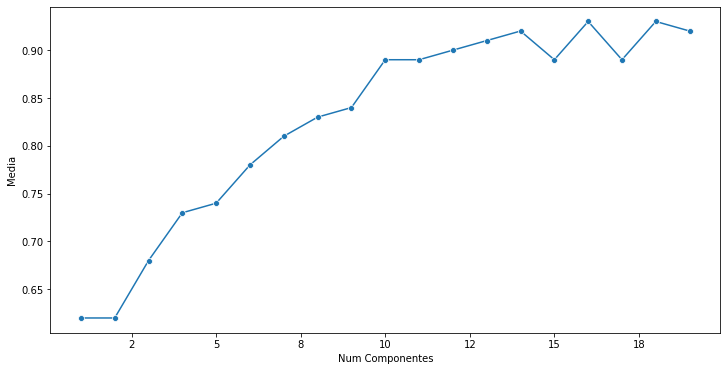

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))  
g = sns.lineplot(y='Media', x = 'Num Componentes', data=df, marker = 'o')
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
plt.savefig('media_pca_componentes_tensorflow.png')

### Curva ROC

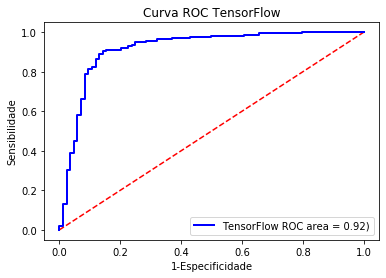

In [30]:
fig = plt.figure()
plt.xlabel('1-Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC TensorFlow')
plt.plot(fpr, tpr, color='blue', lw=2, label='TensorFlow ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()
fig.savefig('ROC_TensorFlow.PNG')

# AVALIAÇÃO DO PCA DIVISÃO TESTE/TREINO

In [ ]:
convergencia = False
auc_total = []
auc_num_componentes = []
media_anterior = 0
auc_divisao = []
numAucsComponentes = []
numAucsDivisao = []
for divisao in np.arange(0.1, 1, 0.1):
    print("Divisão", divisao)
    
    for numComponentes in range(1,20):
        print(numComponentes)
        
        auc_componente = []
        media_anterior = 0
        qtd_iguais = 0
        pca_MLP = PCA(n_components = numComponentes)
        pca_MLP.fit(scaled_data)
        x_pca_MLP = pca_MLP.transform(scaled_data)
        
        convergencia = False
        print("Componente", numComponentes)
            
        while(not convergencia):
            X_train, X_test, y_train, y_test = aplicaKFoldAlterado(x_pca_MLP, df_bigml_target, divisao)
            predictedprob = aplicaTensor(X_train, X_test, y_train, y_test, numComponentes)
           
            fpr, tpr, thresholds = roc_curve(y_test, predictedprob)
            roc_auc = auc(fpr, tpr)
            
            auc_componente.append(roc_auc)#FEITO
            media_aucs = round(sum(auc_componente) / len(auc_componente), 2)#feito
           
            if media_anterior == media_aucs:
                qtd_iguais = qtd_iguais + 1
            if qtd_iguais == 10:
                
                auc_num_componentes.append(media_aucs)#feito
                auc_total.append(auc_componente)
                convergencia = True
                
            media_anterior = media_aucs
            print("Media Anterior", media_anterior)
            print("QUANTIDADE", qtd_iguais)
            
    numAucsDivisao.append(numAucsComponentes)
    auc_divisao.append(auc_total)
    
    numAucsComponentes = []
    auc_total = []
    
    

1    2850
0     483
Name: Churn, dtype: int64
DIVISAO DA BASE DE DADOS0++++++++++++++++++++++++++++++ 0.1
1
COMPONENTE++++++++++++++++++++++++++++++++++++++ 1
Epoch 1/30
2999/2999 [==============================] - 0s 159us/step - loss: 0.5725 - accuracy: 0.8303
Epoch 2/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.4781 - accuracy: 0.8533
Epoch 3/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4554 - accuracy: 0.8533
Epoch 4/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4400 - accuracy: 0.8533
Epoch 5/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4274 - accuracy: 0.8533
Epoch 6/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4200 - accuracy: 0.8533
Epoch 7/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.4164 - accuracy: 0.8533
Epoch 8/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.4143 - accuracy: 0.8533
Epoch 9/30
2999/

2999/2999 [==============================] - 0s 16us/step - loss: 0.4207 - accuracy: 0.8560
Epoch 6/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4139 - accuracy: 0.8560
Epoch 7/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.4106 - accuracy: 0.8560
Epoch 8/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.4092 - accuracy: 0.8560
Epoch 9/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.4078 - accuracy: 0.8560
Epoch 10/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.4083 - accuracy: 0.8560
Epoch 11/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.4080 - accuracy: 0.8560
Epoch 12/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4085 - accuracy: 0.8560
Epoch 13/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.4075 - accuracy: 0.8560
Epoch 14/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.

2999/2999 [==============================] - 0s 20us/step - loss: 0.4037 - accuracy: 0.8586
Epoch 12/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4033 - accuracy: 0.8586
Epoch 13/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4034 - accuracy: 0.8586
Epoch 14/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.4036 - accuracy: 0.8586
Epoch 15/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.4031 - accuracy: 0.8586
Epoch 16/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.4025 - accuracy: 0.8586
Epoch 17/30
2999/2999 [==============================] - 0s 19us/step - loss: 0.4025 - accuracy: 0.8586
Epoch 18/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4029 - accuracy: 0.8586
Epoch 19/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4036 - accuracy: 0.8586
Epoch 20/30
2999/2999 [==============================] - 0s 16us/step - loss

2999/2999 [==============================] - 0s 17us/step - loss: 0.4089 - accuracy: 0.8556
Epoch 18/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4101 - accuracy: 0.8556
Epoch 19/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.4087 - accuracy: 0.8556
Epoch 20/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4081 - accuracy: 0.8556
Epoch 21/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.4086 - accuracy: 0.8556
Epoch 22/30
2999/2999 [==============================] - 0s 26us/step - loss: 0.4083 - accuracy: 0.8556
Epoch 23/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.4086 - accuracy: 0.8556
Epoch 24/30
2999/2999 [==============================] - 0s 24us/step - loss: 0.4084 - accuracy: 0.8556
Epoch 25/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.4096 - accuracy: 0.8556
Epoch 26/30
2999/2999 [==============================] - ETA: 0s - loss: 0.3

2999/2999 [==============================] - 0s 16us/step - loss: 0.4104 - accuracy: 0.8550
Epoch 23/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4098 - accuracy: 0.8550
Epoch 24/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4094 - accuracy: 0.8550
Epoch 25/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4094 - accuracy: 0.8550
Epoch 26/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4097 - accuracy: 0.8550
Epoch 27/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4094 - accuracy: 0.8550
Epoch 28/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.4094 - accuracy: 0.8550
Epoch 29/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4104 - accuracy: 0.8550
Epoch 30/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4096 - accuracy: 0.8550
Media Anterior 0.57
QUANTIDADE 10
2
COMPONENTE++++++++++++++++++++++++++++++

2999/2999 [==============================] - 0s 16us/step - loss: 0.4109 - accuracy: 0.8523
Epoch 28/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4113 - accuracy: 0.8523
Epoch 29/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4104 - accuracy: 0.8523
Epoch 30/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4106 - accuracy: 0.8523
Media Anterior 0.59
QUANTIDADE 1
Epoch 1/30
2999/2999 [==============================] - 0s 59us/step - loss: 0.5424 - accuracy: 0.8313
Epoch 2/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4579 - accuracy: 0.8540
Epoch 3/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4466 - accuracy: 0.8540
Epoch 4/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.4389 - accuracy: 0.8540
Epoch 5/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4324 - accuracy: 0.8540
Epoch 6/30
2999/2999 [==========================

2999/2999 [==============================] - 0s 18us/step - loss: 0.4319 - accuracy: 0.8606
Epoch 4/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.4247 - accuracy: 0.8606
Epoch 5/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.4177 - accuracy: 0.8606
Epoch 6/30
2999/2999 [==============================] - 0s 20us/step - loss: 0.4124 - accuracy: 0.8606
Epoch 7/30
2999/2999 [==============================] - 0s 19us/step - loss: 0.4065 - accuracy: 0.8606
Epoch 8/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.4039 - accuracy: 0.8606
Epoch 9/30
2999/2999 [==============================] - 0s 20us/step - loss: 0.4017 - accuracy: 0.8606
Epoch 10/30
2999/2999 [==============================] - 0s 19us/step - loss: 0.3992 - accuracy: 0.8606
Epoch 11/30
2999/2999 [==============================] - 0s 19us/step - loss: 0.3981 - accuracy: 0.8606
Epoch 12/30
2999/2999 [==============================] - 0s 19us/step - loss: 0.39

2999/2999 [==============================] - 0s 16us/step - loss: 0.4141 - accuracy: 0.8520
Epoch 10/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4133 - accuracy: 0.8520
Epoch 11/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4140 - accuracy: 0.8520
Epoch 12/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.4123 - accuracy: 0.8520
Epoch 13/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4118 - accuracy: 0.8520
Epoch 14/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4130 - accuracy: 0.8520
Epoch 15/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4124 - accuracy: 0.8520
Epoch 16/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4132 - accuracy: 0.8520
Epoch 17/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4119 - accuracy: 0.8520
Epoch 18/30
2999/2999 [==============================] - 0s 15us/step - loss

2999/2999 [==============================] - 0s 20us/step - loss: 0.3533 - accuracy: 0.8680
Epoch 14/30
2999/2999 [==============================] - 0s 20us/step - loss: 0.3530 - accuracy: 0.8706
Epoch 15/30
2999/2999 [==============================] - 0s 20us/step - loss: 0.3514 - accuracy: 0.8713
Epoch 16/30
2999/2999 [==============================] - 0s 19us/step - loss: 0.3517 - accuracy: 0.8713
Epoch 17/30
2999/2999 [==============================] - 0s 19us/step - loss: 0.3507 - accuracy: 0.8703
Epoch 18/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3502 - accuracy: 0.8726
Epoch 19/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3498 - accuracy: 0.8706
Epoch 20/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3487 - accuracy: 0.8713
Epoch 21/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3480 - accuracy: 0.8720
Epoch 22/30
2999/2999 [==============================] - 0s 23us/step - loss

2999/2999 [==============================] - 0s 15us/step - loss: 0.3472 - accuracy: 0.8763
Epoch 20/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3462 - accuracy: 0.8736
Epoch 21/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3462 - accuracy: 0.8750
Epoch 22/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3469 - accuracy: 0.8753
Epoch 23/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3459 - accuracy: 0.8766
Epoch 24/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.3450 - accuracy: 0.8766
Epoch 25/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.3449 - accuracy: 0.8763
Epoch 26/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3462 - accuracy: 0.8756
Epoch 27/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3444 - accuracy: 0.8756
Epoch 28/30
2999/2999 [==============================] - 0s 15us/step - loss

2999/2999 [==============================] - 0s 16us/step - loss: 0.3516 - accuracy: 0.8756
Epoch 25/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3533 - accuracy: 0.8700
Epoch 26/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3506 - accuracy: 0.8733
Epoch 27/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3506 - accuracy: 0.8746
Epoch 28/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3500 - accuracy: 0.8743
Epoch 29/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3506 - accuracy: 0.8720
Epoch 30/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3499 - accuracy: 0.8733
Media Anterior 0.73
QUANTIDADE 7
Epoch 1/30
2999/2999 [==============================] - 0s 56us/step - loss: 0.5374 - accuracy: 0.8043
Epoch 2/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.4363 - accuracy: 0.8580
Epoch 3/30
2999/2999 [=======================

2999/2999 [==============================] - 0s 16us/step - loss: 0.3169 - accuracy: 0.8920
Epoch 29/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3162 - accuracy: 0.8943
Epoch 30/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3152 - accuracy: 0.8946
Media Anterior 0.75
QUANTIDADE 0
Epoch 1/30
2999/2999 [==============================] - 0s 57us/step - loss: 0.5464 - accuracy: 0.7893
Epoch 2/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.4254 - accuracy: 0.8533
Epoch 3/30
2999/2999 [==============================] - 0s 29us/step - loss: 0.4002 - accuracy: 0.8586
Epoch 4/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3853 - accuracy: 0.8730
Epoch 5/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3731 - accuracy: 0.8753
Epoch 6/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.3649 - accuracy: 0.8773
Epoch 7/30
2999/2999 [===========================

2999/2999 [==============================] - 0s 15us/step - loss: 0.3817 - accuracy: 0.8726
Epoch 5/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3704 - accuracy: 0.8770
Epoch 6/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3619 - accuracy: 0.8816
Epoch 7/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3548 - accuracy: 0.8820
Epoch 8/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.3492 - accuracy: 0.8843
Epoch 9/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.3443 - accuracy: 0.8863
Epoch 10/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3396 - accuracy: 0.8876
Epoch 11/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3374 - accuracy: 0.8873
Epoch 12/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3316 - accuracy: 0.8900
Epoch 13/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3

2999/2999 [==============================] - 0s 16us/step - loss: 0.3433 - accuracy: 0.8856
Epoch 10/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3392 - accuracy: 0.8886
Epoch 11/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3342 - accuracy: 0.8920
Epoch 12/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3318 - accuracy: 0.8896
Epoch 13/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3283 - accuracy: 0.8893
Epoch 14/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3252 - accuracy: 0.8920
Epoch 15/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3237 - accuracy: 0.8943
Epoch 16/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3215 - accuracy: 0.8926
Epoch 17/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3193 - accuracy: 0.8936
Epoch 18/30
2999/2999 [==============================] - 0s 16us/step - loss

2999/2999 [==============================] - 0s 16us/step - loss: 0.3242 - accuracy: 0.8913
Epoch 16/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3213 - accuracy: 0.8936
Epoch 17/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3206 - accuracy: 0.8933
Epoch 18/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3199 - accuracy: 0.8930
Epoch 19/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3177 - accuracy: 0.8923
Epoch 20/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3170 - accuracy: 0.8930
Epoch 21/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3167 - accuracy: 0.8943
Epoch 22/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3151 - accuracy: 0.8946
Epoch 23/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3147 - accuracy: 0.8940
Epoch 24/30
2999/2999 [==============================] - 0s 14us/step - loss

Epoch 21/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2924 - accuracy: 0.9073
Epoch 22/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2916 - accuracy: 0.9070
Epoch 23/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2903 - accuracy: 0.9080
Epoch 24/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2893 - accuracy: 0.9070
Epoch 25/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2886 - accuracy: 0.9083
Epoch 26/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2874 - accuracy: 0.9090
Epoch 27/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2862 - accuracy: 0.9076
Epoch 28/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2868 - accuracy: 0.9070
Epoch 29/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2870 - accuracy: 0.9080
Epoch 30/30
2999/2999 [==============================] - 0s 16us

2999/2999 [==============================] - 0s 16us/step - loss: 0.3251 - accuracy: 0.9020
Epoch 10/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3200 - accuracy: 0.9003
Epoch 11/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3158 - accuracy: 0.9003
Epoch 12/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3121 - accuracy: 0.9053
Epoch 13/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3087 - accuracy: 0.9043
Epoch 14/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3064 - accuracy: 0.9046
Epoch 15/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3038 - accuracy: 0.9053
Epoch 16/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3035 - accuracy: 0.9030
Epoch 17/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3001 - accuracy: 0.9053
Epoch 18/30
2999/2999 [==============================] - 0s 16us/step - loss

2999/2999 [==============================] - 0s 16us/step - loss: 0.2866 - accuracy: 0.9066
Epoch 28/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2849 - accuracy: 0.9090
Epoch 29/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2842 - accuracy: 0.9080
Epoch 30/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2846 - accuracy: 0.9093
Media Anterior 0.75
QUANTIDADE 2
Epoch 1/30
2999/2999 [==============================] - 0s 57us/step - loss: 0.5355 - accuracy: 0.7743
Epoch 2/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.4135 - accuracy: 0.8543
Epoch 3/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3954 - accuracy: 0.8543
Epoch 4/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3827 - accuracy: 0.8620
Epoch 5/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3695 - accuracy: 0.8723
Epoch 6/30
2999/2999 [==========================

2999/2999 [==============================] - 0s 16us/step - loss: 0.3964 - accuracy: 0.8553
Epoch 4/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3843 - accuracy: 0.8613
Epoch 5/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3712 - accuracy: 0.8743
Epoch 6/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3595 - accuracy: 0.8816
Epoch 7/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3487 - accuracy: 0.8903
Epoch 8/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3399 - accuracy: 0.8943
Epoch 9/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3314 - accuracy: 0.8983
Epoch 10/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3261 - accuracy: 0.8990
Epoch 11/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.3210 - accuracy: 0.8986
Epoch 12/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.31

2999/2999 [==============================] - 0s 16us/step - loss: 0.3271 - accuracy: 0.8966
Epoch 9/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3213 - accuracy: 0.8983
Epoch 10/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3160 - accuracy: 0.8970
Epoch 11/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3118 - accuracy: 0.8990
Epoch 12/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3083 - accuracy: 0.9003
Epoch 13/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3056 - accuracy: 0.9003
Epoch 14/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3043 - accuracy: 0.9013
Epoch 15/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3007 - accuracy: 0.9023
Epoch 16/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2991 - accuracy: 0.9026
Epoch 17/30
2999/2999 [==============================] - 0s 16us/step - loss:

2999/2999 [==============================] - 0s 16us/step - loss: 0.2954 - accuracy: 0.9060
Epoch 15/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.2923 - accuracy: 0.9076
Epoch 16/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2911 - accuracy: 0.9066
Epoch 17/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.2878 - accuracy: 0.9060
Epoch 18/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2889 - accuracy: 0.9076
Epoch 19/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2846 - accuracy: 0.9080
Epoch 20/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2828 - accuracy: 0.9096
Epoch 21/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2816 - accuracy: 0.9076
Epoch 22/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2793 - accuracy: 0.9096
Epoch 23/30
2999/2999 [==============================] - 0s 19us/step - loss

2999/2999 [==============================] - 0s 17us/step - loss: 0.2880 - accuracy: 0.9070
Epoch 21/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2870 - accuracy: 0.9063
Epoch 22/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2857 - accuracy: 0.9070
Epoch 23/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2853 - accuracy: 0.9060
Epoch 24/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2834 - accuracy: 0.9073
Epoch 25/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2819 - accuracy: 0.9066
Epoch 26/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2817 - accuracy: 0.9070
Epoch 27/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2812 - accuracy: 0.9070
Epoch 28/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2782 - accuracy: 0.9083
Epoch 29/30
2999/2999 [==============================] - 0s 15us/step - loss

2999/2999 [==============================] - 0s 16us/step - loss: 0.2699 - accuracy: 0.9133
Epoch 27/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2680 - accuracy: 0.9130
Epoch 28/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2680 - accuracy: 0.9133
Epoch 29/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2669 - accuracy: 0.9123
Epoch 30/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2664 - accuracy: 0.9133
Media Anterior 0.78
QUANTIDADE 7
Epoch 1/30
2999/2999 [==============================] - 0s 57us/step - loss: 0.5060 - accuracy: 0.8139
Epoch 2/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4049 - accuracy: 0.8526
Epoch 3/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3840 - accuracy: 0.8660
Epoch 4/30
2999/2999 [==============================] - 0s 14us/step - loss: 0.3687 - accuracy: 0.8793
Epoch 5/30
2999/2999 [=========================

2999/2999 [==============================] - 0s 58us/step - loss: 0.5908 - accuracy: 0.6846
Epoch 2/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4154 - accuracy: 0.8540
Epoch 3/30
2999/2999 [==============================] - 0s 19us/step - loss: 0.3957 - accuracy: 0.8540
Epoch 4/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3822 - accuracy: 0.8586
Epoch 5/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3691 - accuracy: 0.8676
Epoch 6/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3571 - accuracy: 0.8763
Epoch 7/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3453 - accuracy: 0.8783
Epoch 8/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3343 - accuracy: 0.8853
Epoch 9/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3241 - accuracy: 0.8900
Epoch 10/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3177

2999/2999 [==============================] - 0s 16us/step - loss: 0.3217 - accuracy: 0.8913
Epoch 8/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3139 - accuracy: 0.8923
Epoch 9/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3065 - accuracy: 0.8926
Epoch 10/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3017 - accuracy: 0.8963
Epoch 11/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2952 - accuracy: 0.8986
Epoch 12/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2896 - accuracy: 0.9026
Epoch 13/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2849 - accuracy: 0.9026
Epoch 14/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2811 - accuracy: 0.9040
Epoch 15/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2770 - accuracy: 0.9046
Epoch 16/30
2999/2999 [==============================] - 0s 15us/step - loss: 

2999/2999 [==============================] - 0s 17us/step - loss: 0.2852 - accuracy: 0.9063
Epoch 14/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2821 - accuracy: 0.9063
Epoch 15/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2814 - accuracy: 0.9063
Epoch 16/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2756 - accuracy: 0.9073
Epoch 17/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2719 - accuracy: 0.9106
Epoch 18/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2693 - accuracy: 0.9103
Epoch 19/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2660 - accuracy: 0.9116
Epoch 20/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2633 - accuracy: 0.9126
Epoch 21/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2610 - accuracy: 0.9146
Epoch 22/30
2999/2999 [==============================] - 0s 16us/step - loss

2999/2999 [==============================] - 0s 16us/step - loss: 0.2670 - accuracy: 0.9120
Epoch 20/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2639 - accuracy: 0.9113
Epoch 21/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2604 - accuracy: 0.9113
Epoch 22/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2594 - accuracy: 0.9120
Epoch 23/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2564 - accuracy: 0.9133
Epoch 24/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2546 - accuracy: 0.9146
Epoch 25/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2540 - accuracy: 0.9143
Epoch 26/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.2509 - accuracy: 0.9146
Epoch 27/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2495 - accuracy: 0.9163
Epoch 28/30
2999/2999 [==============================] - 0s 16us/step - loss

2999/2999 [==============================] - 0s 16us/step - loss: 0.2405 - accuracy: 0.9190
Epoch 25/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2386 - accuracy: 0.9193
Epoch 26/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2380 - accuracy: 0.9166
Epoch 27/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2345 - accuracy: 0.9206
Epoch 28/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2356 - accuracy: 0.9200
Epoch 29/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2320 - accuracy: 0.9206
Epoch 30/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2309 - accuracy: 0.9200
Media Anterior 0.87
QUANTIDADE 2
Epoch 1/30
2999/2999 [==============================] - 0s 57us/step - loss: 0.4721 - accuracy: 0.8433
Epoch 2/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3977 - accuracy: 0.8553
Epoch 3/30
2999/2999 [=======================

2999/2999 [==============================] - 0s 16us/step - loss: 0.2282 - accuracy: 0.9206
Media Anterior 0.87
QUANTIDADE 7
Epoch 1/30
2999/2999 [==============================] - 0s 69us/step - loss: 0.6475 - accuracy: 0.6225
Epoch 2/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.4156 - accuracy: 0.8533
Epoch 3/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3819 - accuracy: 0.8566
Epoch 4/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3605 - accuracy: 0.8646
Epoch 5/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3440 - accuracy: 0.8700
Epoch 6/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3304 - accuracy: 0.8816
Epoch 7/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3182 - accuracy: 0.8856
Epoch 8/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3078 - accuracy: 0.8866
Epoch 9/30
2999/2999 [=============================

2999/2999 [==============================] - 0s 17us/step - loss: 0.3549 - accuracy: 0.8683
Epoch 6/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3435 - accuracy: 0.8756
Epoch 7/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3319 - accuracy: 0.8806
Epoch 8/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3180 - accuracy: 0.8856
Epoch 9/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3052 - accuracy: 0.8966
Epoch 10/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2917 - accuracy: 0.9010
Epoch 11/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2811 - accuracy: 0.9030
Epoch 12/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2722 - accuracy: 0.9063
Epoch 13/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2664 - accuracy: 0.9076
Epoch 14/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.

2999/2999 [==============================] - 0s 18us/step - loss: 0.2785 - accuracy: 0.8996
Epoch 12/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.2731 - accuracy: 0.9033
Epoch 13/30
2999/2999 [==============================] - 0s 21us/step - loss: 0.2670 - accuracy: 0.9050
Epoch 14/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2623 - accuracy: 0.9066
Epoch 15/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2585 - accuracy: 0.9080
Epoch 16/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2547 - accuracy: 0.9090
Epoch 17/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2513 - accuracy: 0.9103
Epoch 18/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2480 - accuracy: 0.9110
Epoch 19/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2455 - accuracy: 0.9133
Epoch 20/30
2999/2999 [==============================] - 0s 15us/step - loss

2999/2999 [==============================] - 0s 19us/step - loss: 0.2534 - accuracy: 0.9136
Epoch 17/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2508 - accuracy: 0.9123
Epoch 18/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2490 - accuracy: 0.9160
Epoch 19/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2456 - accuracy: 0.9160
Epoch 20/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2436 - accuracy: 0.9160
Epoch 21/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2419 - accuracy: 0.9166
Epoch 22/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2430 - accuracy: 0.9130
Epoch 23/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.2364 - accuracy: 0.9166
Epoch 24/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2337 - accuracy: 0.9183
Epoch 25/30
2999/2999 [==============================] - 0s 16us/step - loss

2999/2999 [==============================] - 0s 16us/step - loss: 0.2121 - accuracy: 0.9300
Epoch 22/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2106 - accuracy: 0.9283
Epoch 23/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2089 - accuracy: 0.9270
Epoch 24/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2061 - accuracy: 0.9316
Epoch 25/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2032 - accuracy: 0.9340
Epoch 26/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2024 - accuracy: 0.9323
Epoch 27/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.1996 - accuracy: 0.9343
Epoch 28/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.1977 - accuracy: 0.9373
Epoch 29/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.1963 - accuracy: 0.9376
Epoch 30/30
2999/2999 [==============================] - 0s 15us/step - loss

2999/2999 [==============================] - 0s 17us/step - loss: 0.2056 - accuracy: 0.9276
Epoch 28/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2034 - accuracy: 0.9320
Epoch 29/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2006 - accuracy: 0.9333
Epoch 30/30
2999/2999 [==============================] - 0s 22us/step - loss: 0.1984 - accuracy: 0.9306
Media Anterior 0.89
QUANTIDADE 3
Epoch 1/30
2999/2999 [==============================] - 0s 62us/step - loss: 0.5283 - accuracy: 0.7593
Epoch 2/30
2999/2999 [==============================] - 0s 20us/step - loss: 0.4069 - accuracy: 0.8533
Epoch 3/30
2999/2999 [==============================] - 0s 20us/step - loss: 0.3779 - accuracy: 0.8536
Epoch 4/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.3590 - accuracy: 0.8590
Epoch 5/30
2999/2999 [==============================] - 0s 20us/step - loss: 0.3436 - accuracy: 0.8653
Epoch 6/30
2999/2999 [==========================

2999/2999 [==============================] - 0s 17us/step - loss: 0.3767 - accuracy: 0.8613
Epoch 4/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3556 - accuracy: 0.8656
Epoch 5/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3395 - accuracy: 0.8713
Epoch 6/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3233 - accuracy: 0.8770
Epoch 7/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3063 - accuracy: 0.8863
Epoch 8/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2918 - accuracy: 0.8936
Epoch 9/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2760 - accuracy: 0.9003
Epoch 10/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2651 - accuracy: 0.9026
Epoch 11/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2562 - accuracy: 0.9143
Epoch 12/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.24

Epoch 21/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2164 - accuracy: 0.9270
Epoch 22/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2145 - accuracy: 0.9250
Epoch 23/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2104 - accuracy: 0.9260
Epoch 24/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2112 - accuracy: 0.9246
Epoch 25/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2073 - accuracy: 0.9260
Epoch 26/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2029 - accuracy: 0.9306
Epoch 27/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2015 - accuracy: 0.9293
Epoch 28/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.1994 - accuracy: 0.9306
Epoch 29/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.1956 - accuracy: 0.9326
Epoch 30/30
2999/2999 [==============================] - 0s 16us

2999/2999 [==============================] - 0s 17us/step - loss: 0.2783 - accuracy: 0.8980
Epoch 10/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2692 - accuracy: 0.9030
Epoch 11/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2603 - accuracy: 0.9063
Epoch 12/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2534 - accuracy: 0.9080
Epoch 13/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2481 - accuracy: 0.9100
Epoch 14/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2425 - accuracy: 0.9170
Epoch 15/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2376 - accuracy: 0.9143
Epoch 16/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2332 - accuracy: 0.9186
Epoch 17/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2293 - accuracy: 0.9180
Epoch 18/30
2999/2999 [==============================] - 0s 15us/step - loss

2999/2999 [==============================] - 0s 16us/step - loss: 0.2401 - accuracy: 0.9166
Epoch 16/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2345 - accuracy: 0.9213
Epoch 17/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2302 - accuracy: 0.9203
Epoch 18/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2263 - accuracy: 0.9240
Epoch 19/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2229 - accuracy: 0.9253
Epoch 20/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2185 - accuracy: 0.9270
Epoch 21/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2159 - accuracy: 0.9260
Epoch 22/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2133 - accuracy: 0.9300
Epoch 23/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2101 - accuracy: 0.9286
Epoch 24/30
2999/2999 [==============================] - 0s 15us/step - loss

2999/2999 [==============================] - 0s 17us/step - loss: 0.2136 - accuracy: 0.9266
Epoch 21/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2099 - accuracy: 0.9270
Epoch 22/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2065 - accuracy: 0.9306
Epoch 23/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2037 - accuracy: 0.9316
Epoch 24/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2008 - accuracy: 0.9320
Epoch 25/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.1981 - accuracy: 0.9333
Epoch 26/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.1950 - accuracy: 0.9353
Epoch 27/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.1927 - accuracy: 0.9356
Epoch 28/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.1889 - accuracy: 0.9360
Epoch 29/30
2999/2999 [==============================] - 0s 17us/step - loss

2999/2999 [==============================] - 0s 18us/step - loss: 0.1958 - accuracy: 0.9400
Epoch 27/30
2999/2999 [==============================] - 0s 20us/step - loss: 0.1939 - accuracy: 0.9410
Epoch 28/30
2999/2999 [==============================] - 0s 19us/step - loss: 0.1920 - accuracy: 0.9366
Epoch 29/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.1886 - accuracy: 0.9403
Epoch 30/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.1862 - accuracy: 0.9406
Media Anterior 0.88
QUANTIDADE 9
Epoch 1/30
2999/2999 [==============================] - 0s 92us/step - loss: 0.4829 - accuracy: 0.8233
Epoch 2/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.4015 - accuracy: 0.8523
Epoch 3/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3728 - accuracy: 0.8590
Epoch 4/30
2999/2999 [==============================] - 0s 24us/step - loss: 0.3501 - accuracy: 0.8683
Epoch 5/30
2999/2999 [=========================

2999/2999 [==============================] - 0s 57us/step - loss: 0.4939 - accuracy: 0.8136
Epoch 2/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.4004 - accuracy: 0.8526
Epoch 3/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.3678 - accuracy: 0.8660
Epoch 4/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.3449 - accuracy: 0.8723
Epoch 5/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3275 - accuracy: 0.8756
Epoch 6/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.3119 - accuracy: 0.8840
Epoch 7/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.2978 - accuracy: 0.8873
Epoch 8/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.2833 - accuracy: 0.8956
Epoch 9/30
2999/2999 [==============================] - 0s 19us/step - loss: 0.2713 - accuracy: 0.9020
Epoch 10/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.2615

2999/2999 [==============================] - 0s 19us/step - loss: 0.2872 - accuracy: 0.8933
Epoch 8/30
2999/2999 [==============================] - 0s 21us/step - loss: 0.2728 - accuracy: 0.9000
Epoch 9/30
2999/2999 [==============================] - 0s 22us/step - loss: 0.2622 - accuracy: 0.9043
Epoch 10/30
2999/2999 [==============================] - 0s 20us/step - loss: 0.2536 - accuracy: 0.9076
Epoch 11/30
2999/2999 [==============================] - 0s 19us/step - loss: 0.2460 - accuracy: 0.9070
Epoch 12/30
2999/2999 [==============================] - 0s 20us/step - loss: 0.2411 - accuracy: 0.9156
Epoch 13/30
2999/2999 [==============================] - 0s 23us/step - loss: 0.2348 - accuracy: 0.9136
Epoch 14/30
2999/2999 [==============================] - 0s 21us/step - loss: 0.2306 - accuracy: 0.9173
Epoch 15/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.2256 - accuracy: 0.9190
Epoch 16/30
2999/2999 [==============================] - 0s 20us/step - loss: 

2999/2999 [==============================] - 0s 20us/step - loss: 0.2342 - accuracy: 0.9156
Epoch 14/30
2999/2999 [==============================] - 0s 20us/step - loss: 0.2285 - accuracy: 0.9196
Epoch 15/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2238 - accuracy: 0.9183
Epoch 16/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.2196 - accuracy: 0.9223
Epoch 17/30
2999/2999 [==============================] - 0s 18us/step - loss: 0.2162 - accuracy: 0.9216
Epoch 18/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2129 - accuracy: 0.9250
Epoch 19/30
2999/2999 [==============================] - 0s 17us/step - loss: 0.2087 - accuracy: 0.9263
Epoch 20/30
2999/2999 [==============================] - 0s 16us/step - loss: 0.2059 - accuracy: 0.9256
Epoch 21/30
2999/2999 [==============================] - 0s 15us/step - loss: 0.2032 - accuracy: 0.9286
Epoch 22/30
2999/2999 [==============================] - 0s 15us/step - loss

COMPONENTE++++++++++++++++++++++++++++++++++++++ 13


### Gráfico de mapa de calor para o Tensorflow

In [ ]:
def add(x):
    return x+1

#df_divisaodf.astype (float)

In [ ]:
import seaborn as sns
import numpy as np
df = pd.DataFrame()
df['Media'] = auc_num_componentes
df['Num Componentes'] = np.arange(1, 20)

In [180]:
import pandas as pd

In [ ]:
import seaborn as sns
fig = plt.figure(figsize = (12, 6))

df_divisao = pd.DataFrame(auc_divisao)
#df_divisao.astype(float)
df_divisao.set_index(np.arange(1,10), inplace = True)
df_divisao.rename(add, axis='columns', inplace = True)
sns.heatmap(data = df_divisao)
plt.title("Assertividade Tensor Flow")
plt.savefig('assertividade_tensor_flow-divisao-numcomponentes.png')

### Gráfico de quantidade de iterações até a convergência Tensorflow

In [ ]:
import seaborn as sns
fig = plt.figure(figsize = (12,6))

df = pd.DataFrame(numAucsDivisao)
df.set_index(np.arange(1,10), inplace = True)
df.rename(add, axis='columns', inplace=True)
sns.heatmap(data = df, cmap = 'YlGnBu')
plt.title("Quantidade de iterações até a convergência TensorFlow")
plt.savefig('iteracoes-tensor-divisao-numcomponentes.PNG')